In [1]:
import pandas as pd
import jellyfish
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('E_C_NoisySet')
df=df.drop(df.columns[[0]] , 1)

In [4]:
months = ["January", "April", "June", "August", "September", "November"] 
colnames=list(df.columns.values)
for x in colnames:
    if x!='STD_Months':
        col=x
        print(col)
        df[col+'_Hamming'] = ''
        ix = [(row) for row in range(df[col].shape[0])]
        for row in ix:
            print("row: " , row)
            Hamming_best = 20
            best_match = ''
            for month in months:
                s1 = df[col].iat[row]
                print("s1: " , s1 )
                s2 = month        
                print("s2: " , s2)
                Hd = jellyfish.hamming_distance(s1 , s2)
                print("Hamming Distance :" , Hd)
                if Hd < Hamming_best:
                    Hamming_best = Hd
                    best_match = s2
                df[col+'_Hamming'].iat[row] = best_match
                print('\n')
            print("Best Match: " , best_match)
            print("Hamming_best: " , Hamming_best)        
            print("*******")       

0.1_TypoC
row:  0
s1:  Janruary
s2:  January
Hamming Distance : 5


s1:  Janruary
s2:  April
Hamming Distance : 8


s1:  Janruary
s2:  June
Hamming Distance : 6


s1:  Janruary
s2:  August
Hamming Distance : 8


s1:  Janruary
s2:  September
Hamming Distance : 9


s1:  Janruary
s2:  November
Hamming Distance : 8


Best Match:  January
Hamming_best:  5
*******
row:  1
s1:  tAugust
s2:  January
Hamming Distance : 7


s1:  tAugust
s2:  April
Hamming Distance : 7


s1:  tAugust
s2:  June
Hamming Distance : 7


s1:  tAugust
s2:  August
Hamming Distance : 7


s1:  tAugust
s2:  September
Hamming Distance : 9


s1:  tAugust
s2:  November
Hamming Distance : 8


Best Match:  January
Hamming_best:  7
*******
row:  2
s1:  JanJuary
s2:  January
Hamming Distance : 5


s1:  JanJuary
s2:  April
Hamming Distance : 8


s1:  JanJuary
s2:  June
Hamming Distance : 6


s1:  JanJuary
s2:  August
Hamming Distance : 8


s1:  JanJuary
s2:  September
Hamming Distance : 9


s1:  JanJuary
s2:  November
Hamming Dist

In [5]:
from sklearn.metrics import accuracy_score

NameOfColumns = list(df)
HammingAccuracy = []
for x in NameOfColumns:
    if "Hamming" in x:
        print("Hamming Accuracy : " , accuracy_score(df["STD_Months"] , df[x])) 
        HammingAccuracy.append(accuracy_score(df["STD_Months"] , df[x]))
print(HammingAccuracy)

Hamming Accuracy :  0.816666666667
Hamming Accuracy :  0.783333333333
Hamming Accuracy :  0.583333333333
Hamming Accuracy :  0.541666666667
Hamming Accuracy :  0.541666666667
Hamming Accuracy :  0.508333333333
Hamming Accuracy :  0.375
Hamming Accuracy :  0.266666666667
Hamming Accuracy :  0.308333333333
Hamming Accuracy :  0.233333333333
[0.81666666666666665, 0.78333333333333333, 0.58333333333333337, 0.54166666666666663, 0.54166666666666663, 0.5083333333333333, 0.375, 0.26666666666666666, 0.30833333333333335, 0.23333333333333334]


In [6]:
import numpy as np
#Creating an empty DataFrame
columns = ['Original']
diff = pd.DataFrame(index=range(0,121) , columns=columns)
diff['Original'] = df['STD_Months']

#Iterate ove the transformed columns 
percentage = [0.1 , 0.2 ,0.3 ,  0.4 , 0.5 , 0.6 , 0.7 , 0.8 , 0.9 , 1]

for p in percentage:
    """Counting #of wrong transformations"""
    diff['Transformation_' + str(p)] = ''
    c = np.where(df['STD_Months'] != df[ str(p) +'_TypoC_Hamming'])
    
    if len(c[0]) > 0 :    
        for x in np.nditer(c):        
            x = int(x)
            diff['Transformation_' + str(p)].iat[x] = df[ str(p) + '_TypoC_Hamming'].iat[x]
diff   

,Original,Transformation_0.1,Transformation_0.2,Transformation_0.3,Transformation_0.4,Transformation_0.5,Transformation_0.6,Transformation_0.7,Transformation_0.8,Transformation_0.9,Transformation_1
0,January,,,,,,,,,,
1,August,January,,,,September,January,January,January,January,January
2,January,,,,,June,,,,,November
3,November,September,June,,August,January,September,,,September,January
4,April,,,,,January,,January,,January,January
5,April,,,January,,January,January,January,January,January,November
6,June,,,,April,,August,January,January,January,January
7,November,September,September,September,January,,September,,September,September,April
8,January,,,,,September,,,,,
9,August,,,April,,April,January,,January,,January


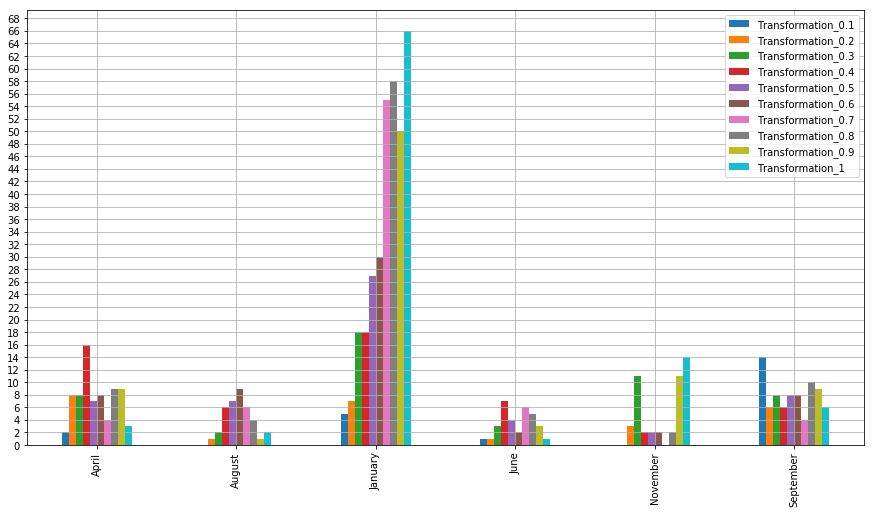

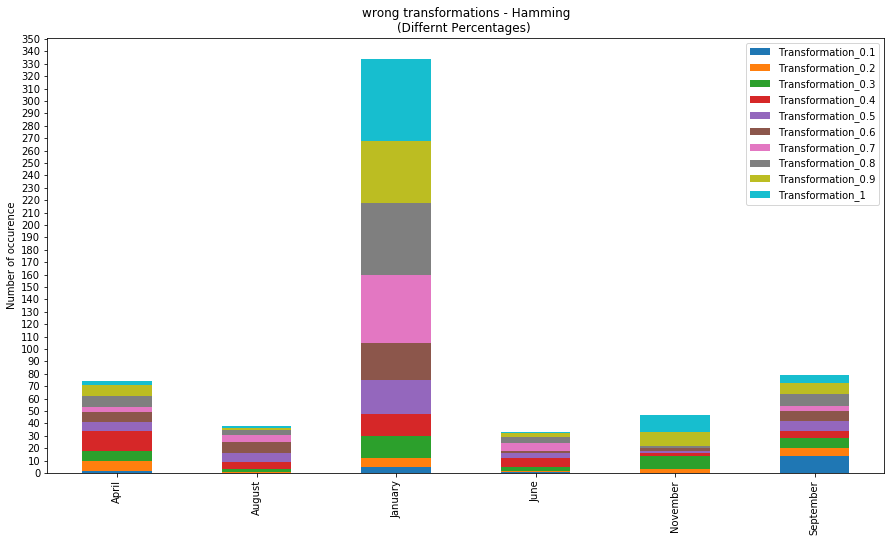

In [11]:
wrong = diff.apply(pd.Series.value_counts)
wrong = wrong.drop(wrong.index[0])
del wrong['Original']
wrong.plot.bar(figsize=(15, 8))
plt.yticks(range(0 , 70 ,2))
plt.grid()
wrong.plot.bar(figsize=(15, 8) ,stacked=True)
plt.yticks(range(0 , 360 ,10))
plt.ylabel('Number of occurence')
plt.title('wrong transformations - Hamming\n(Differnt Percentages) ')
plt.show()

In [12]:
#Creating an empty DataFrame
columns = ['Original']
Result = pd.DataFrame(index=range(0,120) , columns=columns)
Result['Noisy Form'] = ''
Result['Transfromation'] = ''
#Iterate ove the transformed columns 
percentage = [0.1 , 0.2 ,0.3 ,  0.4 , 0.5 , 0.6 , 0.7 , 0.8 , 0.9 , 1]

for p in percentage:
    c = np.where(df['STD_Months'] != df[str(p) +'_TypoC_Hamming'])
    
    if(len(c[0])>0):
        print(str(p) + '_TypoC')             
        for ind in np.nditer(c):            
            ind = int(ind)
            x = diff['Original'].iloc[ind]
            y = diff['Transformation_' + str(p)].iloc[ind]
            z = df[str(p) + '_TypoC'].iloc[ind]
            Result['Original'].iloc[ind] = x
            Result['Noisy Form'].iloc[ind] = z
            Result['Transfromation'].iloc[ind] = y                   
            print('{} To {}'.format(x , y))
            print('Noisy form:' , z)
            print('\n')
        print('********') 

0.1_TypoC
August To January
Noisy form: tAugust


November To September
Noisy form: Nlovember


November To September
Noisy form: NovIember


November To September
Noisy form: NovPember


November To September
Noisy form: NoveHmber


November To September
Noisy form: NoveOmber


January To April
Noisy form: AJanuary


November To September
Noisy form: Nqovember


August To January
Noisy form: KAugust


April To June
Noisy form: JApril


November To September
Noisy form: NEovember


November To September
Noisy form: NoveTmber


November To September
Noisy form: cNovember


November To September
Noisy form: Nzovember


November To September
Noisy form: Noviember


November To September
Noisy form: Nqovember


August To April
Noisy form: Aurgust


August To January
Noisy form: iAugust


November To September
Noisy form: NovRember


September To January
Noisy form: qSeptember


November To September
Noisy form: Nodvember


September To January
Noisy form: GSeptember


********
0.2_TypoC
No

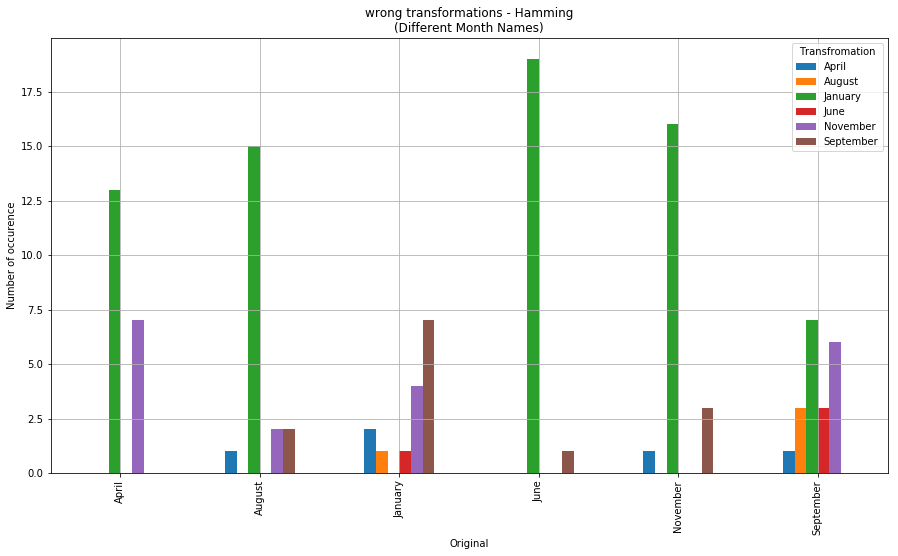

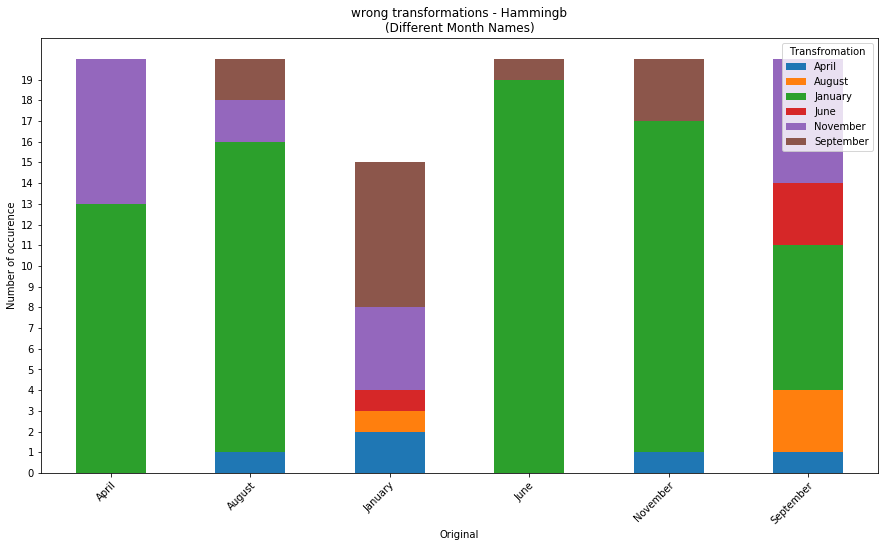

In [13]:
grouped = Result.groupby(['Original' , 'Transfromation'])
new = grouped.size().unstack()
new.plot.bar(figsize=(15, 8))
plt.ylabel('Number of occurence')
plt.title('wrong transformations - Hamming\n(Different Month Names)')
plt.grid()
new.plot.bar(figsize=(15, 8) ,stacked=True)
plt.xticks(rotation='45', rotation_mode='anchor', ha='right')
plt.yticks(range(0 , 20))
plt.ylabel('Number of occurence')
plt.title('wrong transformations - Hammingb\n(Different Month Names)')
plt.show()

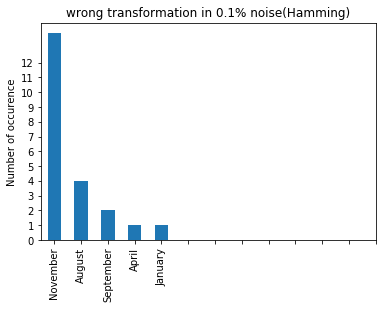

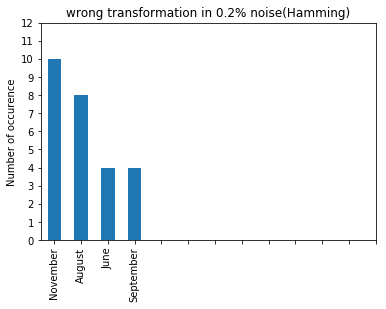

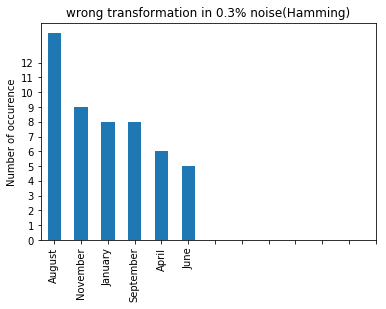

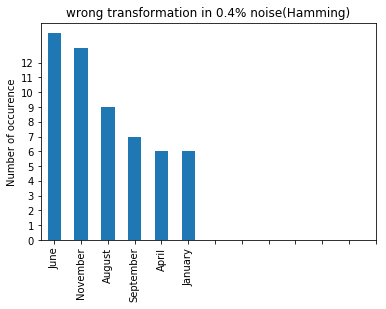

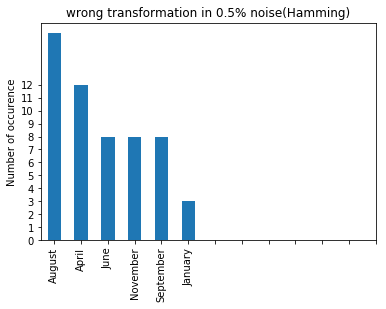

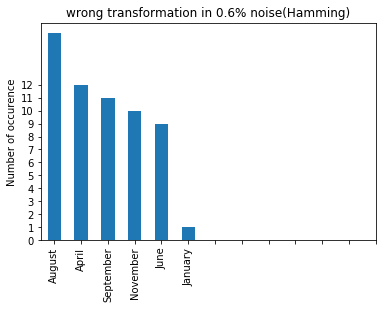

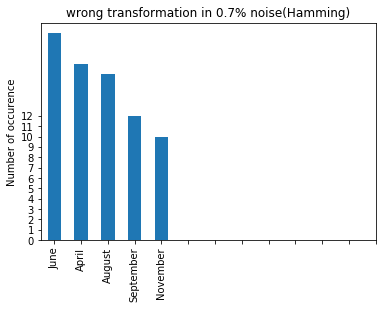

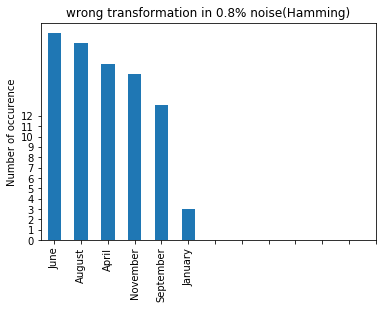

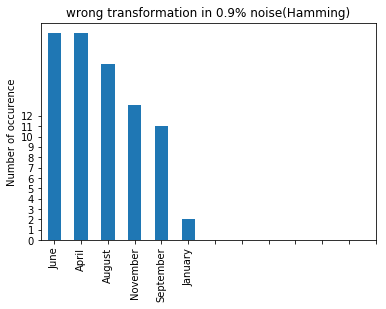

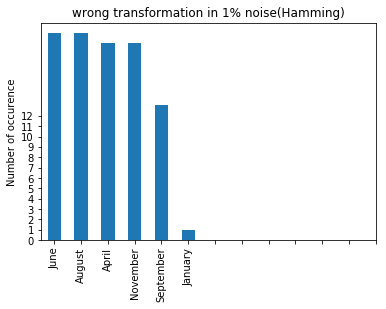

In [14]:
import numpy as np

#Iterate ove the transformed columns 
percentage = [0.1 , 0.2 ,0.3 ,  0.4 , 0.5 , 0.6 , 0.7 , 0.8 , 0.9 , 1]

for p in percentage:
    c = np.where(df['STD_Months'] != df[str(p) +'_TypoC_Hamming'])
    columns = ['Original' , 'Transformation']
    diff = pd.DataFrame(index=range(0,121) , columns=columns)
    diff['Transformation_' + str(p)] = ''
    diff[str(p) + '_TypoC'] = ''
    for x in np.nditer(c):
        x = int(x)
        diff['Original'].iat[x] = df['STD_Months'].iat[x]
        diff[str(p) + '_TypoC'].iat[x] = df[str(p) + '_TypoC'].iat[x]
        diff['Transformation'].iat[x] = df[str(p) + '_TypoC_Hamming'].iat[x]
    diff.dropna()
    wrongTransform = diff['Original'].value_counts()
    wrongTransform.plot.bar()
    plt.yticks(range(0 , 13))
    plt.ylabel('Number of occurence')
    plt.title('wrong transformation in {}% noise(Hamming)'.format(p))
    plt.xticks(range(0,13))
    plt.show() 